## Load libraries

In [145]:
#importing pandas & numpy libraries

import pandas as pd
import numpy as np
!pip install matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Logging

In [146]:
#Logging

import logging

In [147]:
#Configure the logger 
log_format = ' %(asctime)s - %(levelname)s - %(message)s'
logging.basicConfig(filename='app.log',filemode='w',format=log_format,level=logging.DEBUG)

In [148]:
#Create Log Messages

logging.debug("This is a debug message.")
logging.info("This is an info message.")
logging.warning("This is a warning message.")
logging.error("This is an error message.")
logging.critical("This is a critical message.")

## loading dataset

In [149]:
#loading dataset

store_df=pd.read_csv('store.csv')
train_df = pd.read_csv('train.csv', low_memory=False)
test_df=pd.read_csv('test.csv')
sample_df=pd.read_csv('sample_submission.csv')

In [150]:
#show dataset 

store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [151]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [152]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [153]:
sample_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


## Merging train data with store data 

In [154]:
#merge train df with store df

merged_train_df = pd.merge(train_df, store_df, on='Store', how='left')

In [155]:
merged_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


## Merging test data with store data 

In [156]:
#merge test df with store df

Merged_test_df = pd.merge( test_df, store_df, on='Store', how='left')

In [157]:
Merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


## Exploratory Data Analysis

In [158]:
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

### we have 13 numerical columns and 5 categorical columns¶

In [159]:
merged_train_df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

### As we can see some columns (CompetitionDistance ,CompetitionOpenSinceMonth, CompetitionOpenSinceYear ,Promo2SinceWeek,   Promo2SinceYear , PromoInterval ) have missing values 

### work on missing values on train data

In [160]:
merged_train_df['CompetitionDistance'].fillna(merged_train_df['CompetitionDistance'].median(), inplace=True)
merged_train_df['CompetitionOpenSinceYear'].fillna(0, inplace=True)
merged_train_df['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
merged_train_df['Promo2SinceYear'].fillna(0, inplace=True)
merged_train_df['Promo2SinceWeek'].fillna(0, inplace=True)
merged_train_df['PromoInterval'].fillna('Unknown', inplace=True)

In [161]:
merged_train_df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [162]:
# Date feature extraction
merged_train_df['Year'] = pd.DatetimeIndex(merged_train_df['Date']).year
merged_train_df['Month'] = pd.DatetimeIndex(merged_train_df['Date']).month
merged_train_df['Day'] = pd.DatetimeIndex(merged_train_df['Date']).day

In [163]:
merged_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,0.0,0.0,Unknown,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,620.0,9.0,2009.0,0,0.0,0.0,Unknown,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,29910.0,4.0,2015.0,0,0.0,0.0,Unknown,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,1880.0,4.0,2006.0,0,0.0,0.0,Unknown,2013,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,9260.0,0.0,0.0,0,0.0,0.0,Unknown,2013,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,870.0,0.0,0.0,0,0.0,0.0,Unknown,2013,1,1


In [164]:
merged_train_df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
Day                          0
dtype: int64

In [165]:
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

### Now, there is no Missing Values

In [166]:
Merged_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41077 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        40992 non-null  float64
 11  CompetitionOpenSinceMonth  25872 non-null  float64
 12  CompetitionOpenSinceYear   25872 non-null  float64
 13  Promo2                     41088 non-null  int

In [167]:
Merged_test_df['Year'] = pd.DatetimeIndex(Merged_test_df['Date']).year
Merged_test_df['Month'] = pd.DatetimeIndex(Merged_test_df['Date']).month
Merged_test_df['Day'] = pd.DatetimeIndex(Merged_test_df['Date']).day

In [168]:
Merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,9,17
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN,2015,9,17
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN,2015,9,17
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN,2015,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,8,1
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2015,8,1
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2015,8,1
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2015,8,1


In [169]:
Merged_test_df['Open'].unique()

array([ 1., nan,  0.])

### work on missing values on test data

In [170]:
Merged_test_df.isnull().sum()

Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                17232
Year                             0
Month                            0
Day                              0
dtype: int64

In [171]:
Merged_test_df['CompetitionDistance'].fillna(Merged_test_df['CompetitionDistance'].median(), inplace=True)
Merged_test_df['CompetitionOpenSinceYear'].fillna(0, inplace=True)
Merged_test_df['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
Merged_test_df['Promo2SinceYear'].fillna(0, inplace=True)
Merged_test_df['Promo2SinceWeek'].fillna(0, inplace=True)
Merged_test_df['PromoInterval'].fillna(0, inplace=True)
Merged_test_df['Open'].fillna(0, inplace=True)

In [172]:
Merged_test_df.isnull().sum()

Id                           0
Store                        0
DayOfWeek                    0
Date                         0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
Day                          0
dtype: int64

In [173]:
Merged_test_df.to_csv("Merged_test_df.csv")

### Checking Datatypes

In [174]:
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

### we have 16 numerical columns and 5 categorical columns

In [175]:
Merged_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41088 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        41088 non-null  float64
 11  CompetitionOpenSinceMonth  41088 non-null  float64
 12  CompetitionOpenSinceYear   41088 non-null  float64
 13  Promo2                     41088 non-null  int

### we have 15 numerical columns and 5 categorical columns

In [176]:
merged_train_df.Date = merged_train_df.Date.str.replace('-', '').astype(int)

In [177]:
merged_train_df['Date'].unique()

array([20150731, 20150730, 20150729, 20150728, 20150727, 20150726,
       20150725, 20150724, 20150723, 20150722, 20150721, 20150720,
       20150719, 20150718, 20150717, 20150716, 20150715, 20150714,
       20150713, 20150712, 20150711, 20150710, 20150709, 20150708,
       20150707, 20150706, 20150705, 20150704, 20150703, 20150702,
       20150701, 20150630, 20150629, 20150628, 20150627, 20150626,
       20150625, 20150624, 20150623, 20150622, 20150621, 20150620,
       20150619, 20150618, 20150617, 20150616, 20150615, 20150614,
       20150613, 20150612, 20150611, 20150610, 20150609, 20150608,
       20150607, 20150606, 20150605, 20150604, 20150603, 20150602,
       20150601, 20150531, 20150530, 20150529, 20150528, 20150527,
       20150526, 20150525, 20150524, 20150523, 20150522, 20150521,
       20150520, 20150519, 20150518, 20150517, 20150516, 20150515,
       20150514, 20150513, 20150512, 20150511, 20150510, 20150509,
       20150508, 20150507, 20150506, 20150505, 20150504, 20150

In [178]:
Merged_test_df.Date = Merged_test_df.Date.str.replace('-', '').astype(int)

In [179]:
merged_train_df["PromoInterval"].unique()

array(['Unknown', 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov',
       'Mar,Jun,Sept,Dec'], dtype=object)

In [180]:
Merged_test_df["PromoInterval"].unique()

array([0, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [181]:
Merged_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  int32  
 4   Open                       41088 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        41088 non-null  float64
 11  CompetitionOpenSinceMonth  41088 non-null  float64
 12  CompetitionOpenSinceYear   41088 non-null  float64
 13  Promo2                     41088 non-null  int

In [182]:
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  int32  
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [183]:
#checking duplicates 

merged_train_df.duplicated().sum()

0

In [184]:
merged_train_df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
Day                          0
dtype: int64

### Now, there is no Missing Values

In [185]:
# Select numerical columns
numerical_cols = merged_train_df.select_dtypes(include=[np.number])

#Identify outliers using the IQR method
Q1 = numerical_cols['Sales'].quantile(0.25)
Q3 = numerical_cols['Sales'].quantile(0.75)
IQR = Q3 - Q1

#Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Remove outliers
new_train_filtered = numerical_cols[(numerical_cols['Sales'] > lower_bound) & (numerical_cols['Sales'] < upper_bound)]


In [186]:
new_train_filtered

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day
0,1,5,20150731,5263,555,1,1,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,31
1,2,5,20150731,6064,625,1,1,1,570.0,11.0,2007.0,1,13.0,2010.0,2015,7,31
2,3,5,20150731,8314,821,1,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,2015,7,31
3,4,5,20150731,13995,1498,1,1,1,620.0,9.0,2009.0,0,0.0,0.0,2015,7,31
4,5,5,20150731,4822,559,1,1,1,29910.0,4.0,2015.0,0,0.0,0.0,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,20130101,0,0,0,0,1,1900.0,6.0,2014.0,1,31.0,2013.0,2013,1,1
1017205,1112,2,20130101,0,0,0,0,1,1880.0,4.0,2006.0,0,0.0,0.0,2013,1,1
1017206,1113,2,20130101,0,0,0,0,1,9260.0,0.0,0.0,0,0.0,0.0,2013,1,1
1017207,1114,2,20130101,0,0,0,0,1,870.0,0.0,0.0,0,0.0,0.0,2013,1,1


<Axes: xlabel='DayOfWeek', ylabel='Sales'>

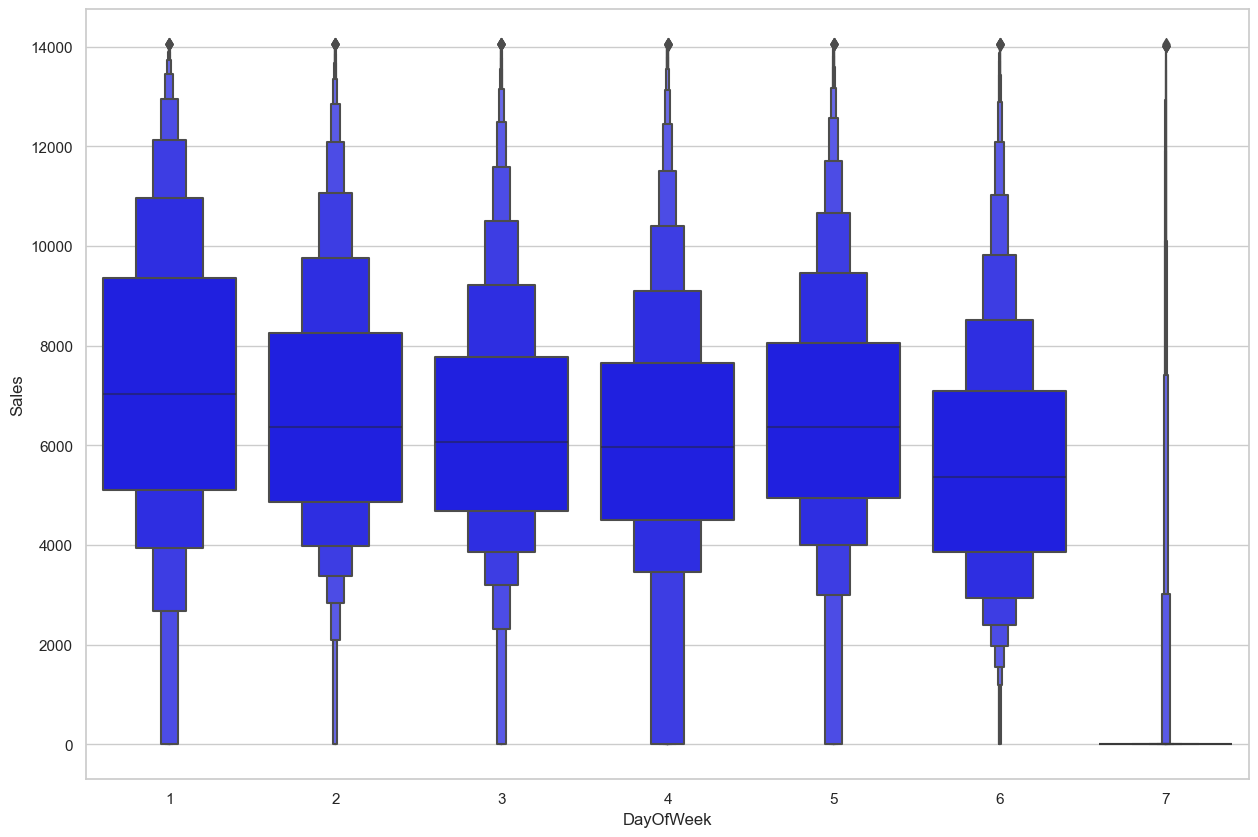

In [187]:
plt.figure(figsize=(15,10))
sns.boxenplot(data=new_train_filtered,x="DayOfWeek",y="Sales",color="Blue")

In [188]:
# Select numerical columns
numerical_cols = merged_train_df.select_dtypes(include=[np.number])

#Identify outliers using the IQR method
Q1 = numerical_cols['Customers'].quantile(0.25)
Q3 = numerical_cols['Customers'].quantile(0.75)
IQR = Q3 - Q1

#Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Remove outliers
new_train_filtered = numerical_cols[(numerical_cols['Customers'] > lower_bound) & (numerical_cols['Customers'] < upper_bound)]


<Axes: xlabel='DayOfWeek', ylabel='Customers'>

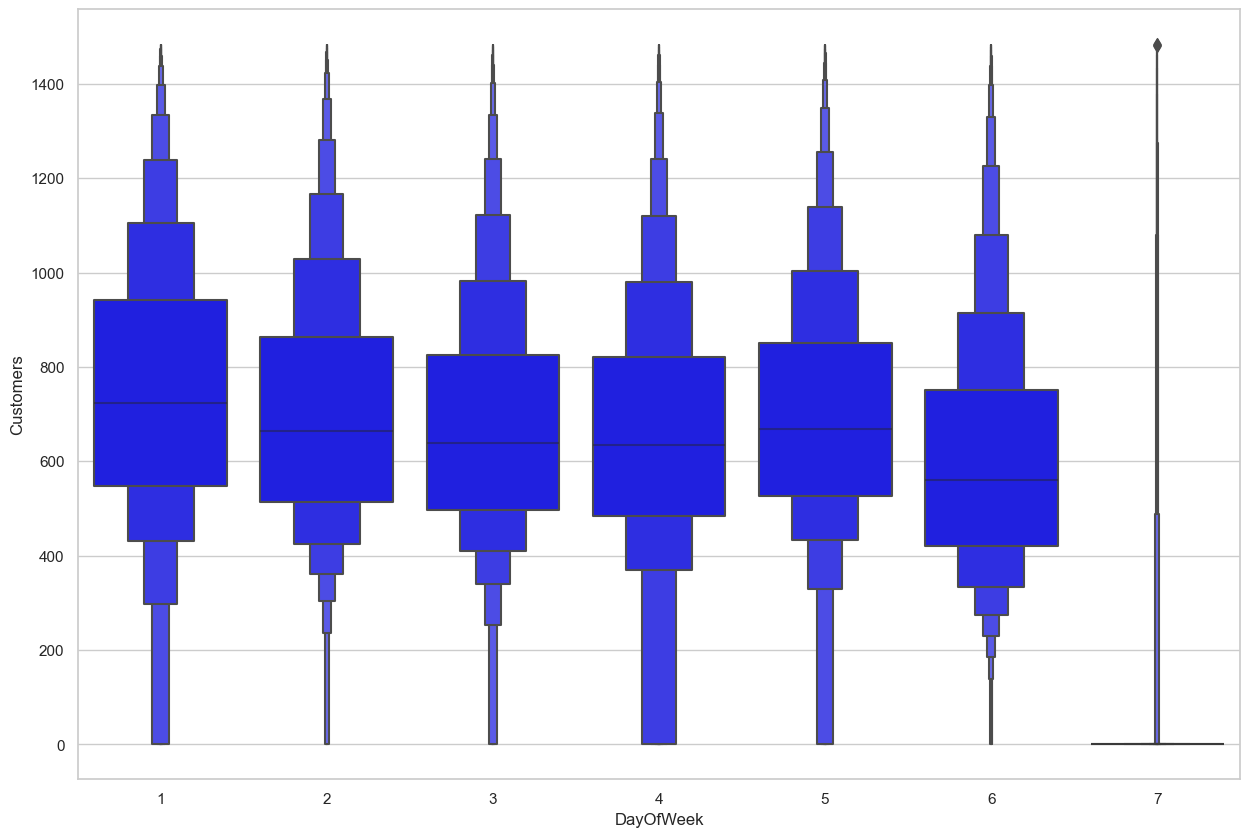

In [189]:
plt.figure(figsize=(15,10))
sns.boxenplot(data=new_train_filtered,x="DayOfWeek",y="Customers",color="Blue")

In [190]:
# Select numerical columns
numerical_columns = Merged_test_df.select_dtypes(include=[np.number])

#Identify outliers using the IQR method
Q1 = numerical_columns['Store'].quantile(0.25)
Q3 = numerical_columns['Store'].quantile(0.75)
IQR = Q3 - Q1

#Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Remove outliers
new_train_filtered_test = numerical_columns[(numerical_columns['Store'] > lower_bound) & (numerical_columns['Store'] < upper_bound)]


In [191]:
new_train_filtered_test

,Id,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day
0,1,1,4,20150917,1.0,1,0,1270.0,9.0,2008.0,0,0.0,0.0,2015,9,17
1,2,3,4,20150917,1.0,1,0,14130.0,12.0,2006.0,1,14.0,2011.0,2015,9,17
2,3,7,4,20150917,1.0,1,0,24000.0,4.0,2013.0,0,0.0,0.0,2015,9,17
3,4,8,4,20150917,1.0,1,0,7520.0,10.0,2014.0,0,0.0,0.0,2015,9,17
4,5,9,4,20150917,1.0,1,0,2030.0,8.0,2000.0,0,0.0,0.0,2015,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,20150801,1.0,0,0,1900.0,6.0,2014.0,1,31.0,2013.0,2015,8,1
41084,41085,1112,6,20150801,1.0,0,0,1880.0,4.0,2006.0,0,0.0,0.0,2015,8,1
41085,41086,1113,6,20150801,1.0,0,0,9260.0,0.0,0.0,0,0.0,0.0,2015,8,1
41086,41087,1114,6,20150801,1.0,0,0,870.0,0.0,0.0,0,0.0,0.0,2015,8,1


<Axes: xlabel='DayOfWeek', ylabel='Store'>

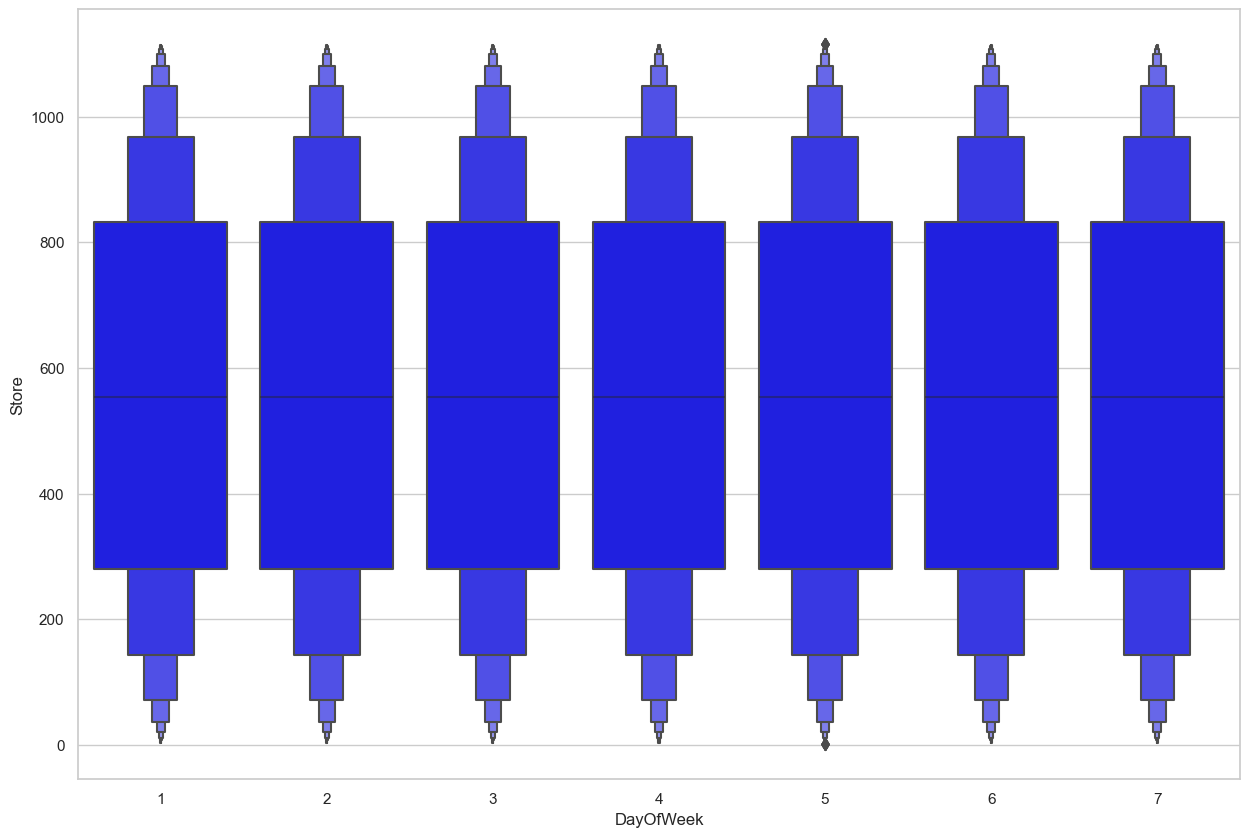

In [192]:
plt.figure(figsize=(15,10))
sns.boxenplot(data=new_train_filtered_test,x="DayOfWeek",y="Store",color="Blue")

In [193]:
#new_train_filtered.to_csv("new_train_filtered.csv")

## 1. Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [194]:
new_train_filtered['Promo'].unique()

array([1, 0], dtype=int64)

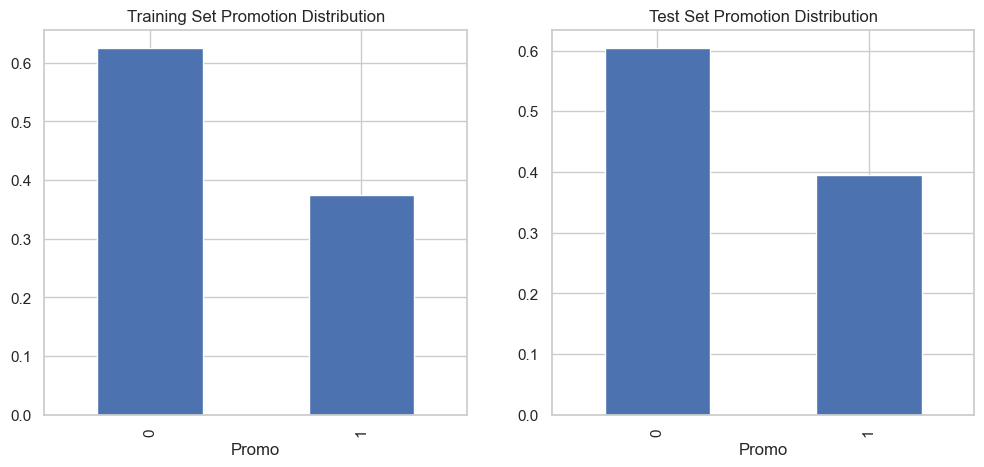

In [195]:
from scipy.stats import chi2_contingency

promo_train = new_train_filtered['Promo'].value_counts(normalize=True)
promo_test = new_train_filtered_test['Promo'].value_counts(normalize=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
promo_train.plot(kind='bar', ax=ax[0], title='Training Set Promotion Distribution')
promo_test.plot(kind='bar', ax=ax[1], title='Test Set Promotion Distribution')
plt.show()

contingency_table = pd.crosstab(new_train_filtered['Promo'], new_train_filtered_test['Promo'])
chi2, p, _, _ = chi2_contingency(contingency_table)



### As we can see distribution in both training and test sets are almost similar

## 2. Check & compare sales behavior before, during and after holidays

In [196]:
plt.figure(figsize=(12,6))
StateHoliday_df = new_train_filtered.groupby("StateHoliday")["Sales"].mean().to_frame().reset_index()
sns.barplot(x=StateHoliday_df["StateHoliday"],y=StateHoliday_df["Sales"],palette="rocket")
plt.tight_layout()

KeyError: 'StateHoliday'

<Figure size 1200x600 with 0 Axes>

### There is more sales before the holiday

### 3. Find out any seasonal (Christmas, Easter etc) purchase behaviours

<Axes: xlabel='Month', ylabel='Sales'>

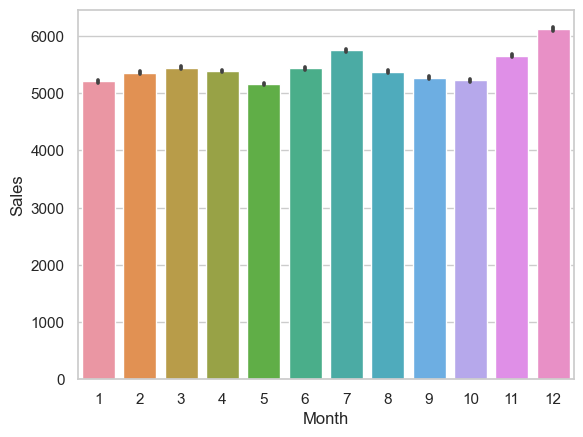

In [202]:
sns.barplot(data=new_train_filtered, x='Month', y='Sales')

### The increase suggests that people may be purchasing medications in advance, either to prepare for holiday closures or for year-end needs.

##  4. What can you say about the correlation between sales and number of customers?

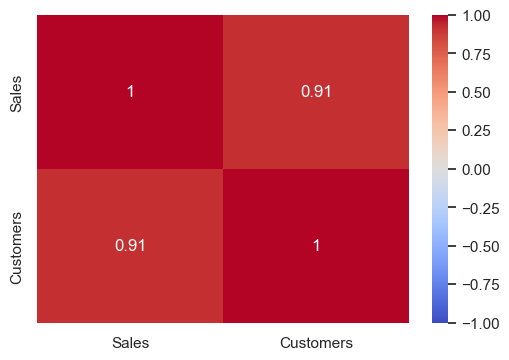

In [203]:

correlation_matrix = new_train_filtered[['Sales', 'Customers']].corr()

plt.figure(figsize=(6, 4))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.show()



### There is a strong positive correlation (close to 1, possibly around 0.89). This suggests that as the number of customers increases, sales also tend to increase proportionally. This positive relationship is expected in retail or pharmaceutical sales, where more customers typically lead to higher sales.

## 5. How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

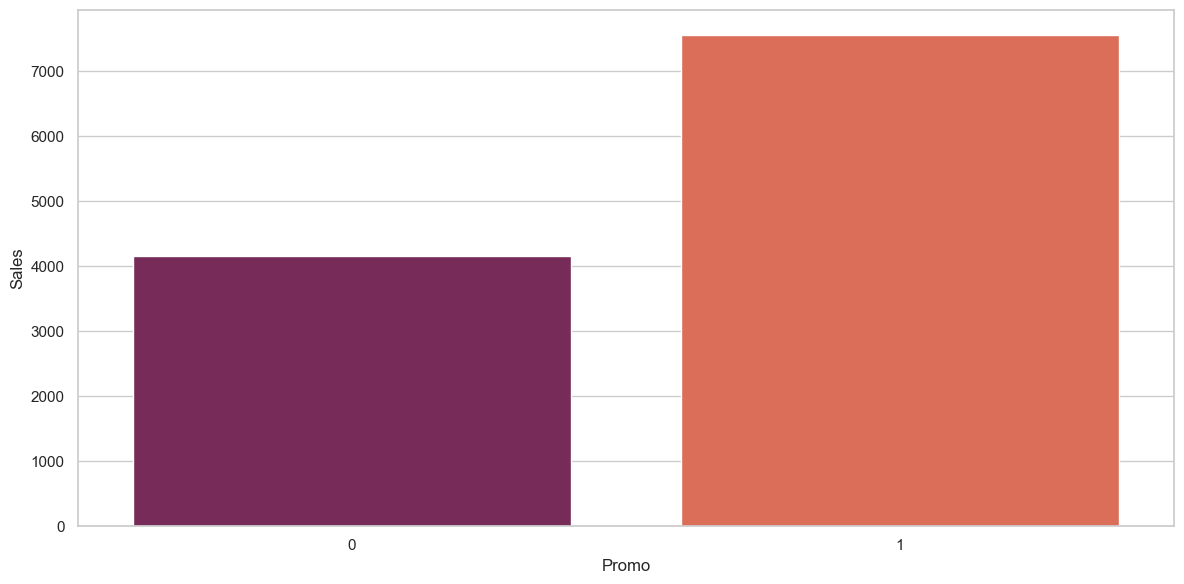

In [204]:
plt.figure(figsize=(12,6))
Promo_df = new_train_filtered.groupby("Promo")["Sales"].mean().to_frame().reset_index()
sns.barplot(x=Promo_df["Promo"],y=Promo_df["Sales"],palette="rocket")
plt.tight_layout()

### There is a strong positive correlation between promotions and sales . This is clear that when discount promotions are offered, sales tend to increase significantly.


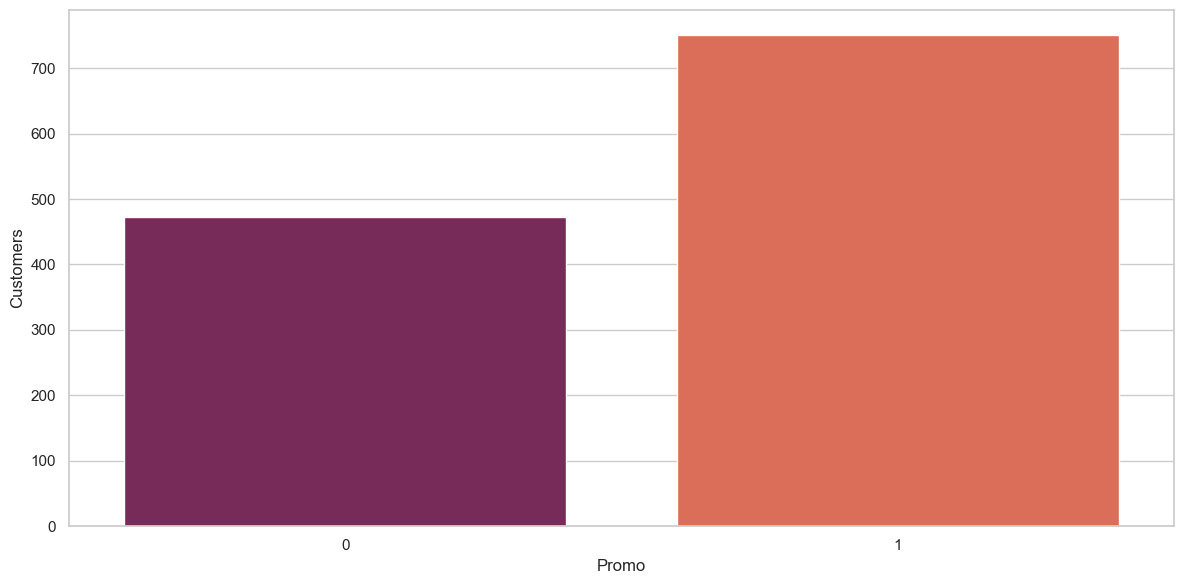

In [205]:
plt.figure(figsize=(12,6))
Promo_df = new_train_filtered.groupby("Promo")["Customers"].mean().to_frame().reset_index()
sns.barplot(x=Promo_df["Promo"],y=Promo_df["Customers"],palette="rocket")
plt.tight_layout()

## 6. Could the promos be deployed in more effective ways? Which stores should promos be deployed in?


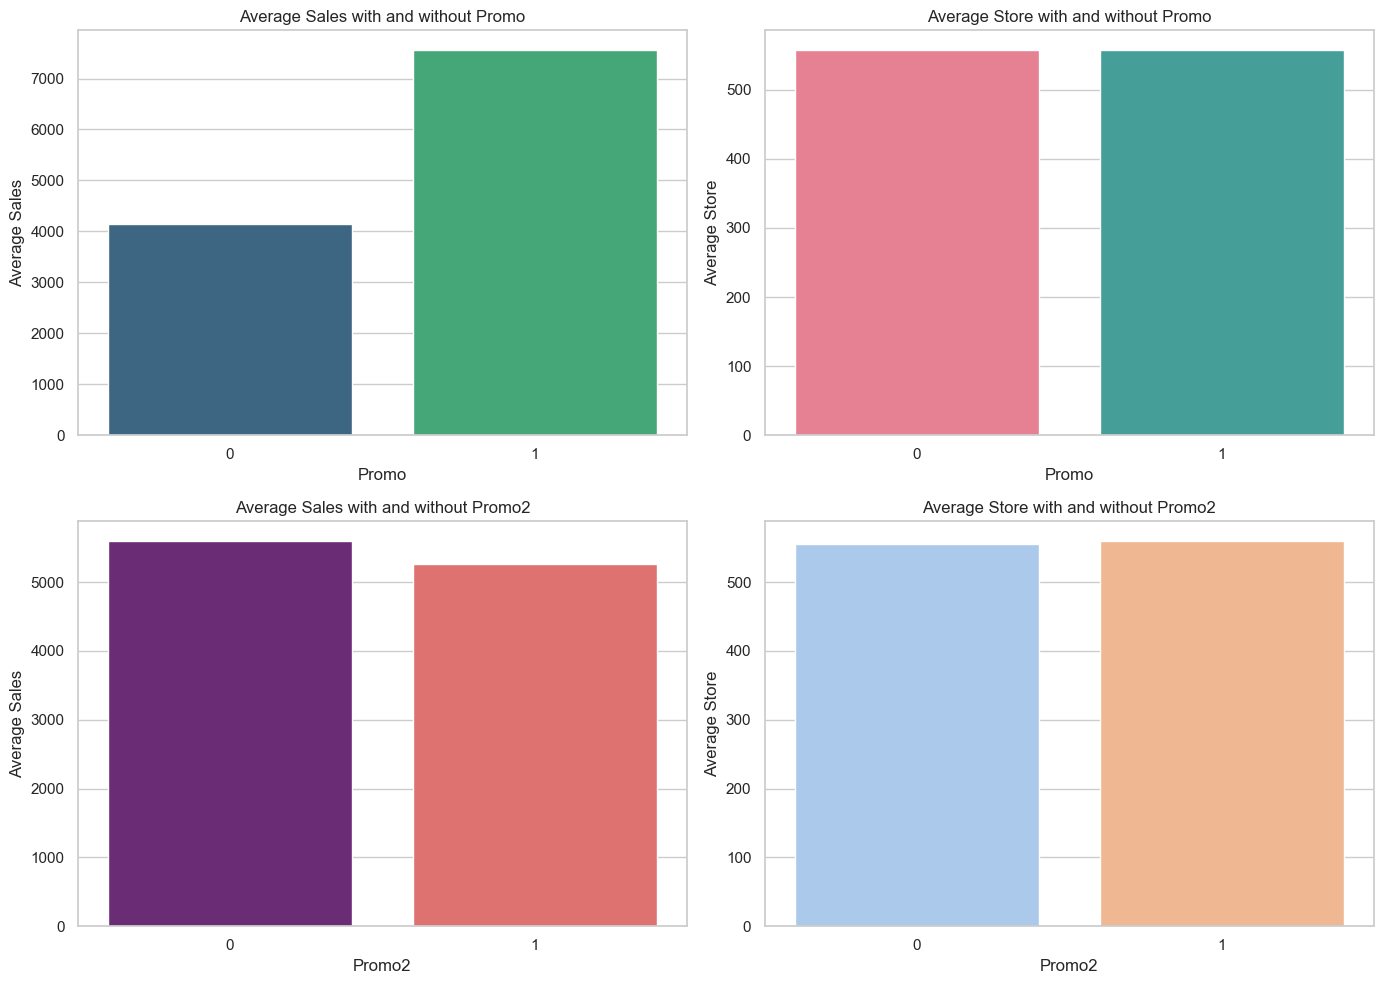

In [206]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

#Average Sales with and without Promo
promo_sales_summary = new_train_filtered.groupby('Promo')['Sales'].mean()
sns.barplot(x=promo_sales_summary.index, y=promo_sales_summary.values, ax=axes[0][0], palette="viridis")
axes[0][0].set_title("Average Sales with and without Promo")
axes[0][0].set_xlabel("Promo")
axes[0][0].set_ylabel("Average Sales")

#Average Customers with and without Promo
promo_customers_summary = new_train_filtered.groupby('Promo')['Store'].mean()
sns.barplot(x=promo_customers_summary.index, y=promo_customers_summary.values, ax=axes[0][1], palette="husl")
axes[0][1].set_title("Average Store with and without Promo")
axes[0][1].set_xlabel("Promo")
axes[0][1].set_ylabel("Average Store")

#Average Sales with and without Promo2
promo2_sales_summary = new_train_filtered.groupby('Promo2')['Sales'].mean()
sns.barplot(x=promo2_sales_summary.index, y=promo2_sales_summary.values, ax=axes[1][0], palette="magma")
axes[1][0].set_title("Average Sales with and without Promo2")
axes[1][0].set_xlabel("Promo2")
axes[1][0].set_ylabel("Average Sales")

#Average Customers with and without Promo2
promo2_customers_summary = new_train_filtered.groupby('Promo2')['Store'].mean()
sns.barplot(x=promo2_customers_summary.index, y=promo2_customers_summary.values, ax=axes[1][1], palette="pastel")
axes[1][1].set_title("Average Store with and without Promo2")
axes[1][1].set_xlabel("Promo2")
axes[1][1].set_ylabel("Average Store")

plt.tight_layout()
plt.show()

## 7. Trends of customer behavior during store open and closing times

In [207]:
# Store open and close data
store_open_time= new_train_filtered[new_train_filtered['Open'] == 1]
store_close_time = new_train_filtered[new_train_filtered['Open'] == 0]

In [208]:
open_count = store_open_time.shape[0]
close_count = store_close_time.shape[0]

In [209]:
labels = ['Open', 'Closed']
counts = [open_count, close_count]

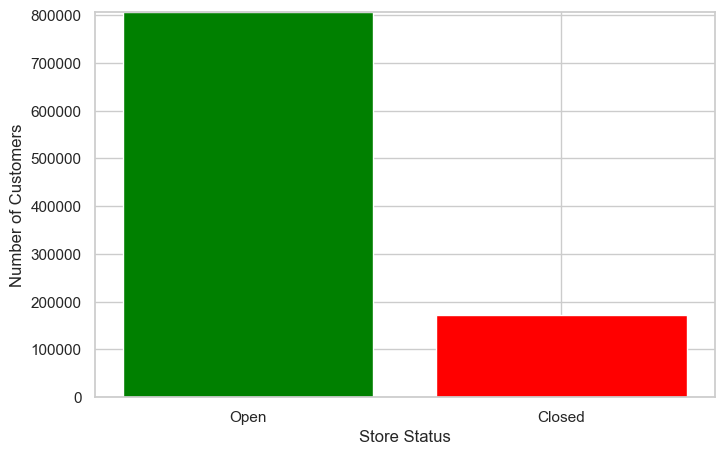

In [210]:
plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color=['green', 'red'])

plt.xlabel('Store Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.ylim(0, max(counts) + 10)
plt.show()

### As we can interpret here when store is open there is very high number of customer 

##  8. Which stores are opened on all weekdays? How does that affect their sales on weekends?


## 9. Check how the assortment type affects sales


In [211]:

assortment_sales = new_train_filtered.groupby('Assortment')['Sales'].mean().reset_index()

# Step 2: Plot the sales by assortment type
plt.figure(figsize=(10, 6))
sns.barplot(data=assortment_sales, x='Assortment', y='Sales', palette='viridis')
plt.title('Average Sales by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Average Sales')
plt.show()


KeyError: 'Assortment'

### This shows that stores with assortment type 3 (Extended) are performing better in terms of sales compared to the other assortment types.

In [212]:
sns.barplot(data=new_train_filtered, x='Assortment', y='Customers')

ValueError: Could not interpret input 'Assortment'

### Assortment type 2 has the highest number of customers on average. Types 1 and 3 have fewer customers, with type 1 having slightly more than type 3.

### In short if we compare, assortment type 2 attracts the most customers, it does not necessarily lead to the highest sales, unlike type 3, which, despite lower customer numbers, achieves higher sales.

## 10. How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?

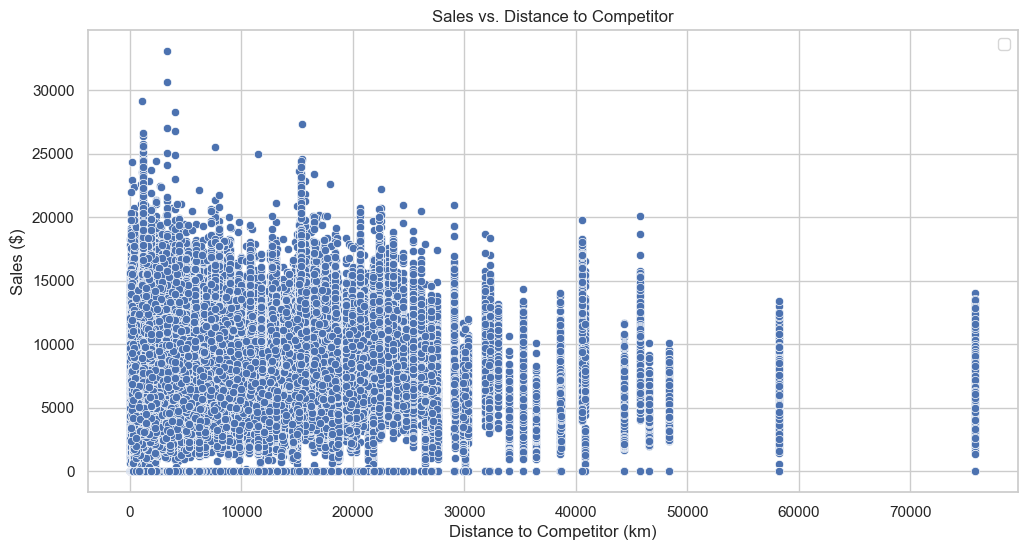

In [213]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=new_train_filtered)
plt.title('Sales vs. Distance to Competitor')
plt.xlabel('Distance to Competitor (km)')
plt.ylabel('Sales ($)')
plt.legend()
plt.grid(True)
plt.show()

### We can say that when the distance with the competitors is less the sale gets higher, which indicates that the distance matters

In [214]:
new_train_filtered1 = new_train_filtered.copy()
new_train_filtered1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day
0,1,5,20150731,5263,555,1,1,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,31
1,2,5,20150731,6064,625,1,1,1,570.0,11.0,2007.0,1,13.0,2010.0,2015,7,31
2,3,5,20150731,8314,821,1,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,2015,7,31
4,5,5,20150731,4822,559,1,1,1,29910.0,4.0,2015.0,0,0.0,0.0,2015,7,31
5,6,5,20150731,5651,589,1,1,1,310.0,12.0,2013.0,0,0.0,0.0,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,20130101,0,0,0,0,1,1900.0,6.0,2014.0,1,31.0,2013.0,2013,1,1
1017205,1112,2,20130101,0,0,0,0,1,1880.0,4.0,2006.0,0,0.0,0.0,2013,1,1
1017206,1113,2,20130101,0,0,0,0,1,9260.0,0.0,0.0,0,0.0,0.0,2013,1,1
1017207,1114,2,20130101,0,0,0,0,1,870.0,0.0,0.0,0,0.0,0.0,2013,1,1


In [200]:
new_train_filtered1.to_csv("new_train_filtered1.csv")

12:37:39 - cmdstanpy - INFO - Chain [1] start processing
12:37:41 - cmdstanpy - INFO - Chain [1] done processing


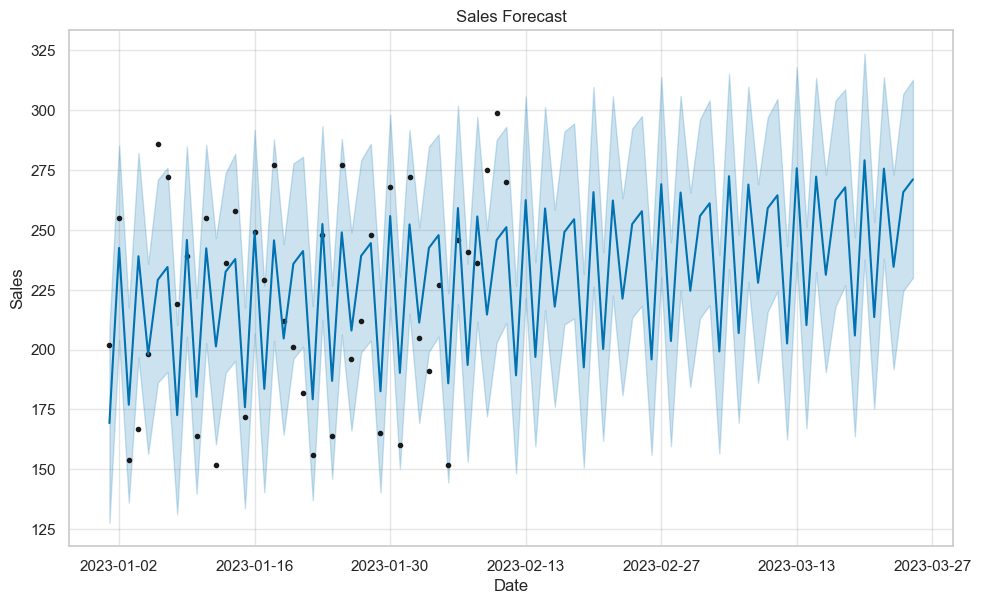

           ds        yhat  yhat_lower  yhat_upper
42 2023-02-12  189.266903  148.298412  226.568177
43 2023-02-13  262.477925  221.429361  305.807029
44 2023-02-14  196.946217  159.600640  236.556365
45 2023-02-15  258.985339  216.564927  301.441593
46 2023-02-16  217.968000  176.176301  258.427597
47 2023-02-17  249.157551  210.509212  291.122009
48 2023-02-18  254.498646  213.080185  294.495855
49 2023-02-19  192.595207  150.713249  231.580390
50 2023-02-20  265.806228  226.308965  309.712533
51 2023-02-21  200.274521  161.869941  240.605393
52 2023-02-22  262.313643  222.633475  305.832222
53 2023-02-23  221.296304  180.950401  263.214054
54 2023-02-24  252.485854  213.386008  292.342470
55 2023-02-25  257.826950  218.373007  297.601318
56 2023-02-26  195.923511  156.090916  237.628808
57 2023-02-27  269.134532  230.253374  313.967290
58 2023-02-28  203.602825  159.644041  244.790736
59 2023-03-01  265.641947  224.560749  306.021903
60 2023-03-02  224.624608  184.286840  265.551184


In [201]:
from prophet import Prophet

# Load your dataset
# Example format: {'Date': ['2023-01-01', '2023-01-02', ...], 'Sales': [200, 220, ...]}
data = {
    'Date': pd.date_range(start='2023-01-01', periods=42),
    'Sales': np.random.randint(150, 300, size=42)  # Random sales data for demonstration
}
new_train_filtered1 = pd.DataFrame(data)

# Prepare the data for Prophet
new_train_filtered1.rename(columns={'Date': 'ds', 'Sales': 'y'}, inplace=True)

# Initialize and fit the model
model = Prophet()
model.fit(new_train_filtered1)

# Create a dataframe to hold predictions for the next 6 weeks (42 days)
future = model.make_future_dataframe(periods=42)

# Make predictions
forecast = model.predict(future)

# Plot the results
model.plot(forecast)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Print the forecast data for the next 6 weeks
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(42))


### Analysis of Trends:
#### Forecasted sales from early February to mid-March show an overall rising trend, with noticeable peaks on specific dates (e.g., March 11 and March 18).

### Variation in Sales:
#### With upper bounds frequently surpassing 300, sales forecasts exhibit a respectable degree of uncertainty, suggesting possible sales peaks on particular days.

### Periods of Uncertainty:
#### A suitable confidence interval is suggested by the yhat_upper and yhat_lower values. For instance, the estimated sales for February 13 are roughly 245 with a range of from 193 to 301, suggesting that there may be variations.

### Seasonal Trends:
#### Look for trends if the data covers several weeks, such as larger sales on weekends (for example, March 11 and March 12 have higher sales).

### Implications for Planning:
#### The prediction can help direct inventory control and marketing strategies, particularly before anticipated high-sales days.